In [2]:
from importlib import reload
import flymovie as fm
import cnn_models.siamese_cnn as cn
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from importlib import reload
from sklearn.manifold import TSNE
import scipy.ndimage as ndi
import skimage as ski
%load_ext autoreload
%autoreload 2

In [37]:
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldcterm-sims-202200502-realkernel-stretch2_wGFzhIht_mix_real_sim_3_34layer.pkl') 
#em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-cterm-blackbox1_GlxqIxOJ_mix_real_sim_3_34layer.pkl') 
em_r, files_r = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldcterm-nc14-real-202200501_mix_real_sim_3_34layer.pkl') 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldcterm-sims-202200502-realkernel-stretch2_wGFzhIht_mix_real_sim_3_34layer.pkl'

In [62]:
def dists_arr_to_row(arr, row):
    dists_sq = np.sum((arr - row) ** 2, axis=1)
    dists = np.sqrt(dists_sq)
    return dists

def dist_to_center(ref_arr, arr):
    center = ref_arr.mean(axis=0)
    sqdist = np.sum((arr - center) ** 2, axis=1)
    return np.sqrt(sqdist)

def find_in_radius(em1, files1, em2, files2, r):
    good_files = []
    for i in range(len(files1)):
        if i % 250 == 0:
            print(i)

        dists = dists_arr_to_row(em2, em1[i])
        good_uns = dists <= r
        #good_files1 = np.array(files1)[good_uns]
        good_files_this = list(np.array(files2)[good_uns])
        good_files = good_files + good_files_this

    return np.unique(good_files)

def d_pairwise_all(em1, em2):
    d = []
    for i in range(len(em2)):
        d_ = list(dists_arr_to_row(em1, em2[i]))
        d = d + d_
    return d

def norm(x):
    mean_ = np.mean(x[x>0])
    return x / mean_ * 1000

def make_df(files):
    p = []
    for f in files:
        #print(f.split('_')[])

        p.append(f.split('_')[1:-1])

    p = np.array(p)
    p = p.astype(float) 
    return pd.DataFrame(p, columns=['ntotal', 'hlb_diam','hlb_nmols', 'n_clusters', 'cluster_diam_mean', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma'])


0


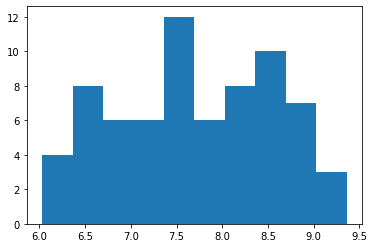

In [166]:
files = find_in_radius(em_r, files_r, em_s, files_s, r=0.7)
n = []
for f in files:
    n.append(float(f.split('_')[-2]))

plt.hist(n, bins=10);

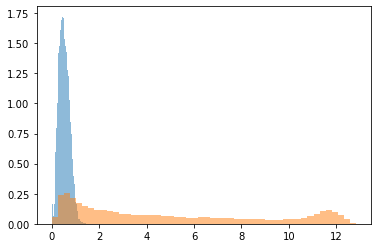

In [157]:
plt.hist(d_pairwise_all(em_r, em_r), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_s, em_s), bins=50, alpha=0.5, density=True);

In [154]:
find_in_radius(em_r, files_r, em_s, files_s, r=0.5)

0


array(['DSi_1893.74_13.85_1_1_1_0.0_1_0.1_7.79_rep0.pkl',
       'NtK_1915.63_12.09_1_1_1_0.0_1_0.1_8.16_rep0.pkl',
       'QjG_2390.69_8.8_1_1_1_0.0_1_0.1_9.31_rep0.pkl',
       'RyD_1979.24_11.0_1_1_1_0.0_1_0.1_8.25_rep0.pkl',
       'ZQY_1741.48_11.16_1_1_1_0.0_1_0.1_6.98_rep0.pkl',
       'aeg_1931.11_8.96_1_1_1_0.0_1_0.1_8.08_rep0.pkl',
       'wHM_1732.43_12.14_1_1_1_0.0_1_0.1_7.74_rep0.pkl'], dtype='<U47')

In [39]:
np.mean([10.2,10.2,10.79,11.29,9.94,10.22,10.47,10.66,10.49,10.55,9.45,9.01,11.02])

10.330000000000002

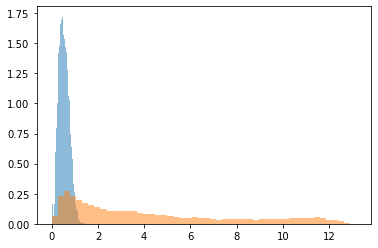

In [126]:
plt.hist(d_pairwise_all(em_r, em_r), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_s, em_s), bins=50, alpha=0.5, density=True);

In [35]:
mask = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/zld-cterm/20220321-zld-cterm-em1-01_2.pkl')
sim = Sim(mask)
sim.conc_to_nmolecules(80)

4809.952710376001

In [186]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_m, files_m = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldmut_early13_mix_real_sim_3_34layer.pkl') 

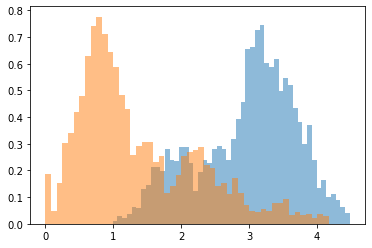

In [56]:
plt.hist(d_pairwise_all(em_w, em_m), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);

In [66]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/zld/zld-real_20220318-zld-mneon-em1-09_4_3.pkl')
fm.viewer(im, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [63]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220210_21x25x25pixels_100x50x50voxel.pkl')
outfolder = '/Users/michaelstadler/Desktop/temp'
nreps = 1
concentration = 80
hlb_diam_rng = [12,12]
hlb_nmols_rng = [1,1]
n_clusters_rng = [60,60]
cluster_diam_mean_rng = [1,1] 
cluster_diam_var_rng = [0.01,0.01]
cluster_nmols_mean_rng = [6,6]
cluster_nmols_var_rng = [1,1]
noise_sigma_rng = [10.2, 10.2]
dims_init=(85, 85, 85)
dims_kernel=(100,50,50)
dims_final=(250,85,85)
gfp_intensity = 2.7

#hlb_coords = [hlb_possible_coords[x] for x in np.random.choice(len(hlb_possible_coords), 2)]
hlb_coords = [(12, 60, 38), (51, 57, 41)]
sims = []
nsims=1
for _ in range(nsims):
    masks = masks_src[np.random.choice(np.arange(masks_src.shape[0]), nsims)]
    sim = fm.sim_rpb1(masks, kernel, outfolder, nreps, concentration, hlb_diam_rng, 
        hlb_nmols_rng, n_clusters_rng, cluster_diam_mean_rng, 
        cluster_diam_var_rng, cluster_nmols_mean_rng, cluster_nmols_var_rng,
        noise_sigma_rng, hlb_coords, dims_init, 
        dims_kernel, dims_final, gfp_intensity, return_sim=True, mask_nuclei=False)
    sims.append(sim.im)

n = 4
#fm.viewer([norm(nucs[n]), norm(sim.im)], 5)
fm.viewer(sim.im, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [64]:
fm.viewer(sim.im, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [69]:
fm.viewer(kernel * 1000, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [10]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220210_21x25x25pixels_100x50x50voxel.pkl')
masks_src = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/mask_files/nc14_1.pkl')

In [104]:
def tnorm(x):
    return (x / np.max(x)) * 1000

def make_kernel(x, shape):
    g = fm.gaussian3d(*x)
    return g(*np.indices(shape))

def double_convolve(im, k1, k2):
    k1 = ndi.zoom(k1, (100/85, 50/85, 50/85))
    k2 = ndi.zoom(k2, (100/85, 50/85, 50/85))
    cv1 = ndi.convolve(im, k1)
    cv2 = ndi.convolve(im, k2)
    fm.viewer([norm(cv1), norm(cv2)], 5)

opt = fm.fitgaussian3d(kernel / np.max(kernel))
kernel_f = make_kernel(opt.x, kernel.shape)

fm.viewer([tnorm(kernel_f), tnorm(kernel)], 5)


interactive(children=(Dropdown(description='Color', index=9, options=('gray_r', 'Gators', 'Reds', 'gray', 'inf…

In [12]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/zld-cterm-unmasked/zld-cterm_20220321-zld-cterm-em1-01_0_1.pkl')

In [53]:
# (z, x, y, height, width_z, width_x, width_y)

z_width = 13
sigma = 3
x = opt.x.copy()
x[1] = 10
x[2] = 10
x[0] = 50
x[4] = z_width
k = make_kernel(x, (101,20,20))

sim = Sim(masks_src[0], res_z=85, res_ij=85)
nmolecules = round(sim.conc_to_nmolecules(36))
sim.add_n_objects(nmolecules, 2.7, 1, 1)
sim.add_kernel(k, res_z=100, res_ij=50)
sim.convolve()
sim.resize((250,85,85),order=0)
sim.add_noise('gaussian', sigma=10)


fm.viewer([norm(sim.im), norm(im)],5)


interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [154]:
sim.resize((250,85,85),order=1)
sim.im.shape

#fm.viewer([norm(sim.im), norm(im)],5)


(100, 100, 100)

In [119]:
z_width = 13
x = opt.x.copy()
x[1] = 10
x[2] = 10
x[0] = 40
x[4] = z_width
k1 = make_kernel(x, (81,20,20))
fm.viewer([k.max(axis=1) * 1000, k1.max(axis=1) * 1000], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [120]:
fm.save_pickle(k1, '/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/fitted_z13_100nmx50x50_80pxx20x20.pkl')

In [131]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220502_100nmx50x50_41pxx25x25.pkl')
fm.viewer(kernel.max(axis=1) * 1000, 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [151]:
k3 = ndi.zoom(kernel, (2, 1, 1))
k3 = k3[10:-10, 2:-2, 2:-2]
k3 = k3 / np.max(k3)
fm.viewer([kernel.max(axis=1) * 1000, k3.max(axis=1) * 1000], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [150]:
sim = Sim(masks_src[0], res_z=85, res_ij=85)
nmolecules = round(sim.conc_to_nmolecules(36))
sim.add_n_objects(nmolecules, 2.7, 1, 1)
sim.add_kernel(k3, res_z=100, res_ij=50)
sim.convolve()
sim.resize((250,85,85),order=0)
sim.add_noise('gaussian', sigma=7)


fm.viewer([norm(sim.im), norm(im)],5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [153]:
fm.save_pickle(k3, '/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220502_100nmx50x50_62pxx21x21_zstretch2.0.pkl')

In [167]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/zld/zld-real_20220318-zld-mneon-em1-09_4_3.pkl')

In [173]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220502_100nmx50x50_62pxx21x21_zstretch2.0.pkl')
outfolder = '/Users/michaelstadler/Desktop/temp'
nreps = 1
concentration = 30
hlb_diam_rng = [12,12]
hlb_nmols_rng = [1,1]
n_clusters_rng = [60,60]
cluster_diam_mean_rng = [1,1] 
cluster_diam_var_rng = [0.01,0.01]
cluster_nmols_mean_rng = [6,6]
cluster_nmols_var_rng = [1,1]
noise_sigma_rng = [3.5, 3.5]
dims_init=(85, 85, 85)
dims_kernel=(100,50,50)
dims_final=(250,85,85)
gfp_intensity = 2.7

#hlb_coords = [hlb_possible_coords[x] for x in np.random.choice(len(hlb_possible_coords), 2)]
hlb_coords = [(12, 60, 38), (51, 57, 41)]
sims = []
nsims=1
for _ in range(nsims):
    masks = masks_src[np.random.choice(np.arange(masks_src.shape[0]), nsims)]
    sim = fm.sim_rpb1(masks, kernel, outfolder, nreps, concentration, hlb_diam_rng, 
        hlb_nmols_rng, n_clusters_rng, cluster_diam_mean_rng, 
        cluster_diam_var_rng, cluster_nmols_mean_rng, cluster_nmols_var_rng,
        noise_sigma_rng, hlb_coords, dims_init, 
        dims_kernel, dims_final, gfp_intensity, return_sim=True, mask_nuclei=True)
    sims.append(sim.im)

n = 4
#fm.viewer([norm(nucs[n]), norm(sim.im)], 5)
fm.viewer([norm(sim.im), norm(im)], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

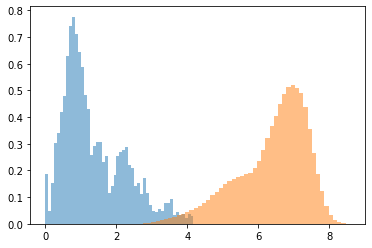

In [201]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-matchsims-202200503-realkernel-stretch1.5_tBcKoKLD_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_s), bins=50, alpha=0.5, density=True);

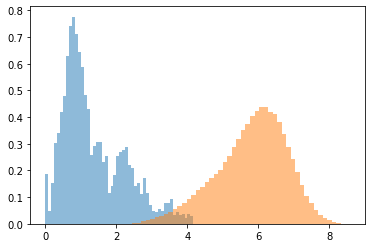

In [206]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-matchsims-202200503-realkernel-stretch2.0_bGdxAfAR_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_s), bins=50, alpha=0.5, density=True);

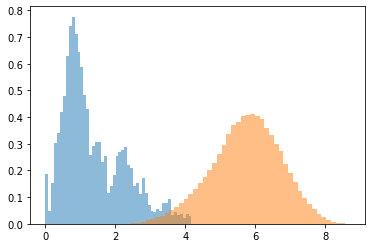

In [203]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-matchsims-202200503-realkernel-stretch2.25_VHLlNeUj_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_s), bins=50, alpha=0.5, density=True);

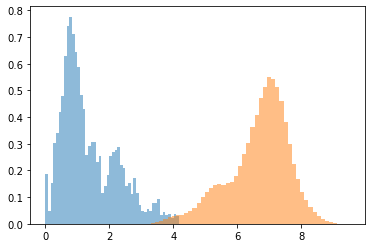

In [204]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-matchsims-202200503-fittedkernel-z8_eRLBrHnt_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_s), bins=50, alpha=0.5, density=True);

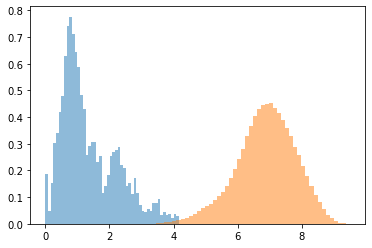

In [205]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-matchsims-202200503-fittedkernel-z12_iIMYDNeI_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_s), bins=50, alpha=0.5, density=True);

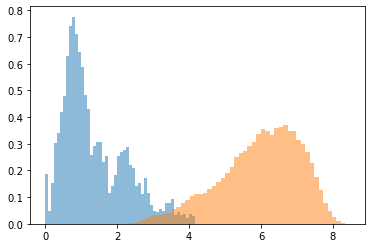

In [242]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-matchsims-202200503-tight2-realkernel-zstretch2.0_vwFxmWFj_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_s), bins=50, alpha=0.5, density=True);

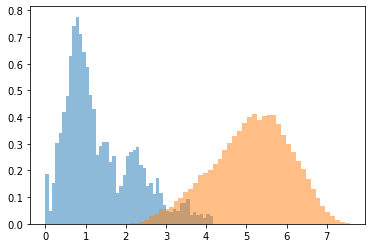

In [244]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-matchsims-202200503-tight2-realkernel-zstretch2.7_UaqwADKX_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_s), bins=50, alpha=0.5, density=True);

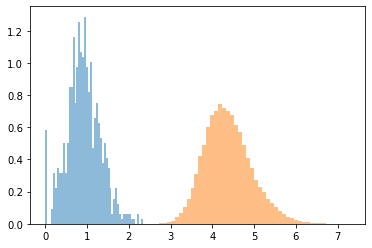

In [260]:
plt.hist(d_pairwise_all(em_m, em_m), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_m, em_s), bins=50, alpha=0.5, density=True);

In [246]:
find_in_radius(em_w, files_w, em_s, files_s, r=2.5)

0


array(['BMH_2903.56_1.0_1_22_1_0.0_4_3.01_4.81_rep1.pkl',
       'CjA_2916.8_1.0_1_20_1_0.0_5_3.95_5.06_rep1.pkl',
       'EvS_2928.25_1.0_1_2_1_0.0_3_2.22_4.84_rep1.pkl',
       'Fhz_2508.35_1.0_1_10_1_0.0_2_2.53_4.39_rep0.pkl',
       'GZQ_2873.25_1.0_1_54_1_0.0_4_2.87_4.73_rep1.pkl',
       'GZQ_3217.22_1.0_1_54_1_0.0_4_2.87_4.73_rep0.pkl',
       'GlH_2873.25_1.0_1_13_1_0.0_5_3.17_4.87_rep1.pkl',
       'Hrc_2657.44_1.0_1_8_1_0.0_3_1.91_3.94_rep1.pkl',
       'IGL_3052.2_1.0_1_26_1_0.0_2_2.85_5.29_rep0.pkl',
       'JPt_2792.03_1.0_1_35_1_0.0_5_3.88_5.08_rep1.pkl',
       'KEW_3051.95_1.0_1_4_1_0.0_6_3.97_4.87_rep1.pkl',
       'KHD_2916.8_1.0_1_9_1_0.0_4_2.63_4.62_rep1.pkl',
       'MLO_2461.45_1.0_1_31_1_0.0_3_0.87_4.5_rep0.pkl',
       'NMC_2916.8_1.0_1_24_1_0.0_3_0.54_4.33_rep1.pkl',
       'NQY_2892.62_1.0_1_6_1_0.0_4_1.84_4.74_rep1.pkl',
       'NVb_2928.25_1.0_1_23_1_0.0_3_3.1_4.38_rep0.pkl',
       'NZM_2916.8_1.0_1_44_1_0.0_2_1.99_4.58_rep1.pkl',
       'Phl_2910.81_1.0_1_

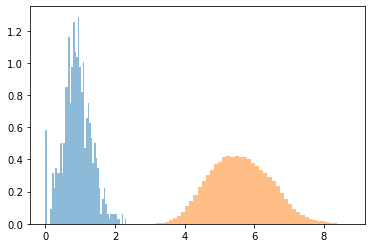

In [193]:
plt.hist(d_pairwise_all(em_m, em_m), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_m, em_s), bins=50, alpha=0.5, density=True);

In [194]:
find_in_radius(em_m, files_m, em_s, files_s, r=3)

0


array(['Iat_3051.95_1.0_1_9_1_0.0_9_3.74_4.67_rep0.pkl',
       'kLv_3217.22_1.0_1_21_1_0.0_4_2.81_4.33_rep1.pkl'], dtype='<U47')

In [264]:
im_real = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/zldmut_early13/zldmutzn5_20220408-zldmutzn5-em1-17_2_0.pkl')
im_sim = fm.load_pickle('/Users/michaelstadler/Desktop/temp/ALs_2484.56_1.0_1_42_1_0.0_4_1.12_3.78_rep1.pkl')
fm.viewer([norm(im_real), norm(im_sim)], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [248]:
files = find_in_radius(em_w, files_w, em_s, files_s, r=2500)
p = []
for f in files:
    #print(f.split('_')[])

    p.append(f.split('_')[1:-1])

p = np.array(p)
p = p.astype(float) 
p_all = p.copy()

0


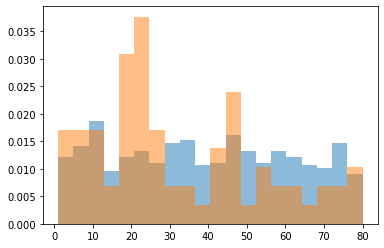

In [250]:
n=3
plt.hist(p_all[:,n], density=True, bins=20, alpha=0.5);
plt.hist(p2[:,n], density=True, bins=20, alpha=0.5);

In [8]:
df = pd.DataFrame(p2, columns=['ntotal', 'hlb_diam','hlb_nmols', 'n_clusters', 'cluster_diam_mean', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma'])


NameError: name 'p2' is not defined

In [99]:
masks_src = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/mask_files/zldmut_nc13_masks.pkl')

In [134]:
masks_src = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/mask_files/zldmut_nc13_masks.pkl')
im_real = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/zldmut_nc14/zldmutzn5_20220408-zldmutzn5-em1-34_0_1.pkl')
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220503_100nmx50x50_79pxx21x21_zstretch3.0.pkl')
outfolder = '/Users/michaelstadler/Desktop/temp'
nreps = 1
concentration = 30
hlb_diam_rng = [12,12]
hlb_nmols_rng = [1,1]
n_clusters_rng = [40,40]
cluster_diam_mean_rng = [2,2] 
cluster_diam_var_rng = [1,1]
cluster_nmols_mean_rng = [2,2]
cluster_nmols_var_rng = [5, 5]
noise_sigma_rng = [5.2,5.2]
dims_init=(85, 85, 85)
dims_kernel=(100,50,50)
dims_final=(250,85,85)
gfp_intensity = 2.7

#hlb_coords = [hlb_possible_coords[x] for x in np.random.choice(len(hlb_possible_coords), 2)]
hlb_coords = [(12, 60, 38), (51, 57, 41)]
sims = []
nsims=1
for _ in range(nsims):
    masks = masks_src[np.random.choice(np.arange(masks_src.shape[0]), nsims)]
    sim = fm.sim_rpb1(masks, kernel, outfolder, nreps, concentration, hlb_diam_rng, 
        hlb_nmols_rng, n_clusters_rng, cluster_diam_mean_rng, 
        cluster_diam_var_rng, cluster_nmols_mean_rng, cluster_nmols_var_rng,
        noise_sigma_rng, hlb_coords, dims_init, 
        dims_kernel, dims_final, gfp_intensity, return_sim=True, mask_nuclei=True)
    sims.append(sim.im)

n = 4
#fm.viewer([norm(nucs[n]), norm(sim.im)], 5)

fm.viewer([norm(sim.im), norm(im_real)], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('gray_r', 'Gators', 'Reds', 'gray', 'inf…

In [142]:
masks_src = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/mask_files/nc12_1.pkl')

In [338]:
im_real = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/rpb1-nc12/rpb1-real_20220318-rpb1-em2-05_1_0.pkl')
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220505_100nmx50x50_53pxx21x21_lobestretch_16_2.5.pkl')
outfolder = '/Users/michaelstadler/Desktop/temp'
nreps = 1
concentration = 130
hlb_diam_rng = [8,8]
hlb_nmols_rng = [900,900]
n_clusters_rng = [30,30]
cluster_diam_mean_rng = [1,1] 
cluster_diam_var_rng = [3,3]
cluster_nmols_mean_rng = [35,35]
cluster_nmols_var_rng = [3,3]
noise_sigma_rng = [4.0,4.0]
dims_init=(85, 85, 85)
dims_kernel=(100,50,50)
dims_final=(250,85,85)
gfp_intensity = 1

#hlb_coords = [hlb_possible_coords[x] for x in np.random.choice(len(hlb_possible_coords), 2)]
hlb_coords = [(36, 60, 60), (45, 36, 36)]
sims = []
nsims=1
for _ in range(nsims):
    masks = masks_src[np.random.choice(np.arange(masks_src.shape[0]), nsims)]
    sim = fm.sim_rpb1(masks, kernel, outfolder, nreps, concentration, hlb_diam_rng, 
        hlb_nmols_rng, n_clusters_rng, cluster_diam_mean_rng, 
        cluster_diam_var_rng, cluster_nmols_mean_rng, cluster_nmols_var_rng,
        noise_sigma_rng, hlb_coords, dims_init, 
        dims_kernel, dims_final, gfp_intensity, return_sim=True, mask_nuclei=True)
    sims.append(sim.im)

n = 4
#fm.viewer([norm(nucs[n]), norm(sim.im)], 5)
fm.viewer([norm(im_real), norm(sim.im)], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('gray_r', 'Gators', 'Reds', 'gray', 'inf…

In [306]:
fm.save_pickle(k2, '/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220505_100nmx50x50_53pxx21x21_lobestretch_16_2.5.pkl')

In [303]:
k = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220503_100nmx50x50_41pxx25x25.pkl')
n=16
stretch = 2.5

top = k[:n]
print(top.shape)
bottom = k[-n:]
middle = k[n:-n]
top = ndi.zoom(top, (stretch,1,1))
bottom = ndi.zoom(bottom, (stretch,1,1))
print(top.shape)
k2 = np.vstack((top, middle, bottom))
k3 = ndi.zoom(k, (stretch,1,1))
k2 = k2[18:-18]
fm.viewer([k.max(axis=0) * 1000, k.max(axis=1) * 1000, k2.max(axis=0) * 1000, k2.max(axis=1) * 1000, k3.max(axis=0) * 1000, k3.max(axis=1) * 1000],5)

(16, 25, 25)
(40, 25, 25)


interactive(children=(Dropdown(description='Color', index=9, options=('gray_r', 'Gators', 'Reds', 'gray', 'inf…

In [285]:
def squinch(arr_in, a):
    arr = arr_in.copy()
    midpoint = int(arr.shape[0] / 2)
    x = np.arange(1, midpoint + 1)
    print(x)
    y = np.exp(x * a)
    y = np.concatenate((y[::-1], [1], y))
    for i in range(arr.shape[0]):
        arr[i] = arr[i] * y[i]
    return arr

k4 = squinch(k, 0.05)
fm.viewer([k.max(axis=0) * 1000, k.max(axis=1) * 1000, k4.max(axis=0) * 1000, k4.max(axis=1) * 1000],5)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


interactive(children=(Dropdown(description='Color', index=9, options=('gray_r', 'Gators', 'Reds', 'gray', 'inf…

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


(0.9, 1.2)

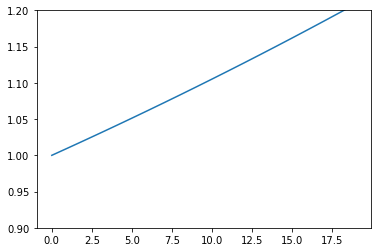

In [270]:
x = np.arange(20)
print(x)
a = 0.01
plt.plot(np.exp(a * x))
plt.ylim((0.9,1.2))

In [233]:
np.concatenate([np.arange(10)[::-1],[0],np.arange(10)])

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

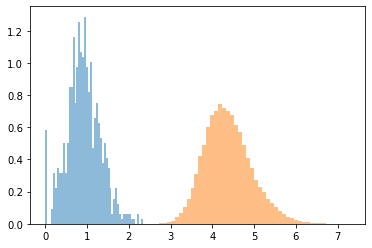

In [121]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings-zld-matchsims-202200503-tight2-realkernel-zstretch2.7_UaqwADKX_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_m, em_m), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_m, em_s), bins=50, alpha=0.5, density=True);

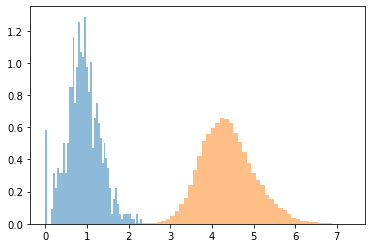

In [123]:
em_m, files_m = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings-zldmut_early13_mix_real_sim_3_34layer.pkl') 
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldmut-matchsims-202200504-tight2-realkernel-zstretch3.0_AIftDXBm_mix_real_sim_3_34layer.pkl')
plt.hist(d_pairwise_all(em_m, em_m), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_m, em_s), bins=50, alpha=0.5, density=True);
#plt.ylim((0,0.2))

In [132]:
"""
0: ntotal
1: hlb_diam
2: hlb_nmols
3: n_clusters
4: cluster_diam_mean, 
5: cluster_diam_var
6: cluster_nmols_mean
7: cluster_nmols_var
8: noise_sigma
"""

make_df(files = find_in_radius(em_m, files_m, em_s, files_s, r=300))

0


,ntotal,hlb_diam,hlb_nmols,n_clusters,cluster_diam_mean,cluster_diam_var,cluster_nmols_mean,cluster_nmols_var,noise_sigma
0,2916.80,1.0,1.0,14.0,1.0,0.52,14.0,0.96,6.08
1,2461.45,1.0,1.0,13.0,1.0,0.79,15.0,3.39,4.84
2,2484.56,1.0,1.0,5.0,2.0,0.82,16.0,0.63,5.30
3,2461.46,1.0,1.0,1.0,2.0,0.21,8.0,3.42,5.95
4,2792.03,1.0,1.0,13.0,1.0,0.57,14.0,3.32,4.37
...,...,...,...,...,...,...,...,...,...
531,2471.50,1.0,1.0,5.0,2.0,0.51,20.0,0.89,5.40
532,2873.25,1.0,1.0,14.0,2.0,0.32,19.0,2.12,6.50
533,2910.81,1.0,1.0,19.0,1.0,0.56,20.0,0.98,5.66
534,3217.22,1.0,1.0,3.0,1.0,0.98,9.0,3.69,5.46


### Zld mut

In [4]:
im_real = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/zldmut_nc14/zldmutzn5_20220408-zldmutzn5-em1-35_6_1.pkl')
mask = np.where(im_real > 0, 1, 0)
mask = ndi.morphology.binary_erosion(mask, np.ones((1,7,7)))
mask = ndi.zoom(mask, (100/34, 1, 1))
mask.shape

(100, 100, 100)

In [6]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220505_100nmx50x50_53pxx21x21_lobestretch_16_2.5.pkl')
outfolder = '/Users/michaelstadler/Desktop/temp'
nreps = 1
concentration = 50
hlb_diam_rng = [12,12]
hlb_nmols_rng = [1,1]
n_clusters_rng = [3,3]
cluster_diam_mean_rng = [1,1] 
cluster_diam_var_rng = [1,1]
cluster_nmols_mean_rng = [15,15]
cluster_nmols_var_rng = [0.001, 0.001]
noise_sigma_rng = [4,4]
dims_init=(85, 85, 85)
dims_kernel=(100,50,50)
dims_final=(250,85,85)
gfp_intensity = 2.7

#hlb_coords = [hlb_possible_coords[x] for x in np.random.choice(len(hlb_possible_coords), 2)]
hlb_coords = [(12, 60, 38), (51, 57, 41)]
sims = []
nsims=1
for _ in range(nsims):
    #masks = masks_src[np.random.choice(np.arange(masks_src.shape[0]), nsims)]
    sim = fm.sim_rpb1([mask], kernel, outfolder, nreps, concentration, hlb_diam_rng, 
        hlb_nmols_rng, n_clusters_rng, cluster_diam_mean_rng, 
        cluster_diam_var_rng, cluster_nmols_mean_rng, cluster_nmols_var_rng,
        noise_sigma_rng, hlb_coords, dims_init, 
        dims_kernel, dims_final, gfp_intensity, return_sim=True, mask_nuclei=True)
    sims.append(sim.im)

n = 4

fm.viewer([norm(sim.im), norm(im_real)], 5)

interactive(children=(Dropdown(description='Color', index=10, options=('Gators', 'magma', 'inferno', 'Reds', '…

### Zld WT

Notes:

- Plausible images can be made with something like 300 3-mer clusters (no variance).
- Can also get ok images from something like 30-ish stronger cluster (mean 7 sd 2).


In [361]:
im_real = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/zld-wt-early13/zld-real_20220318-zld-mneon-em1-08_2_0.pkl')
mask = np.where(im_real > 0, 1, 0)
mask = ndi.morphology.binary_erosion(mask, np.ones((1,7,7)))
mask = ndi.zoom(mask, (100/34, 1, 1))
mask.shape

(100, 100, 100)

In [378]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220505_100nmx50x50_53pxx21x21_lobestretch_16_2.5.pkl')
outfolder = '/Users/michaelstadler/Desktop/temp'
nreps = 1
concentration = 50
hlb_diam_rng = [12,12]
hlb_nmols_rng = [1,1]
n_clusters_rng = [40,40]
cluster_diam_mean_rng = [1,1] 
cluster_diam_var_rng = [1,1]
cluster_nmols_mean_rng = [7,7]
cluster_nmols_var_rng = [1.5, 1.5]
noise_sigma_rng = [3,3]
dims_init=(85, 85, 85)
dims_kernel=(100,50,50)
dims_final=(250,85,85)
gfp_intensity = 2.7

#hlb_coords = [hlb_possible_coords[x] for x in np.random.choice(len(hlb_possible_coords), 2)]
hlb_coords = [(12, 60, 38), (51, 57, 41)]
sims = []
nsims=1
for _ in range(nsims):
    #masks = masks_src[np.random.choice(np.arange(masks_src.shape[0]), nsims)]
    sim = fm.sim_rpb1([mask], kernel, outfolder, nreps, concentration, hlb_diam_rng, 
        hlb_nmols_rng, n_clusters_rng, cluster_diam_mean_rng, 
        cluster_diam_var_rng, cluster_nmols_mean_rng, cluster_nmols_var_rng,
        noise_sigma_rng, hlb_coords, dims_init, 
        dims_kernel, dims_final, gfp_intensity, return_sim=True, mask_nuclei=True)
    sims.append(sim.im)

n = 4

fm.viewer([norm(sim.im), norm(im_real)], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('gray_r', 'Gators', 'Reds', 'gray', 'inf…

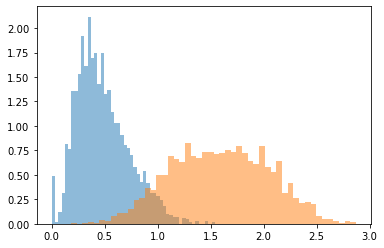

In [8]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-early13_mix_real_sim_20220506_34layer.pkl') 
em_m, files_m = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-mut-early13_mix_real_sim_20220506_34layer.pkl') 
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_m), bins=50, alpha=0.5, density=True);

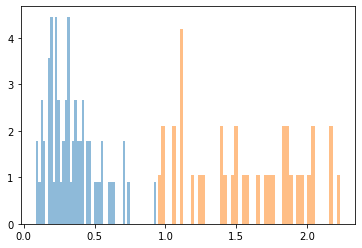

In [13]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-early13_mix_real_sim_20220506_34layer.pkl') 
em_m, files_m = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-mut-early13_mix_real_sim_20220506_34layer.pkl') 
plt.hist(dist_to_center(em_w, em_w), bins=50, alpha=0.5, density=True);
plt.hist(dist_to_center(em_w, em_m), bins=50, alpha=0.5, density=True);

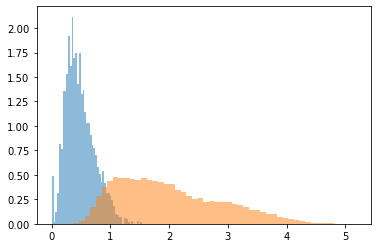

In [57]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-early13_mix_real_sim_20220506_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-20220509-manysmallclust_nwhWyQpp_mix_real_sim_20220506_34layer.pkl') 
plt.hist(d_pairwise_all(em1, em1), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em1, em2), bins=50, alpha=0.5, density=True);

(10000, 256)

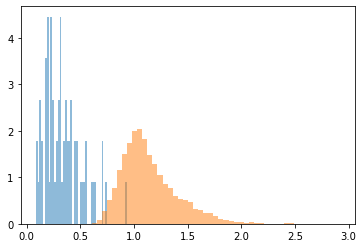

In [82]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-early13_mix_real_sim_20220506_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-20220510-manyparams_bLzbUWJX-mix_real_sim_20220506_34layer.pkl') 
plt.hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
plt.hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

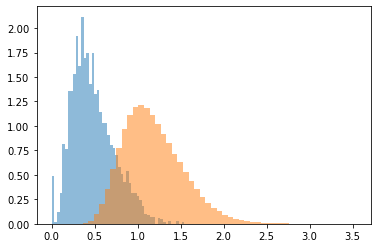

In [85]:
plt.hist(d_pairwise_all(em1, em1), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em1, em2), bins=50, alpha=0.5, density=True);

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000
8250
8500
8750
9000
9250
9500
9750


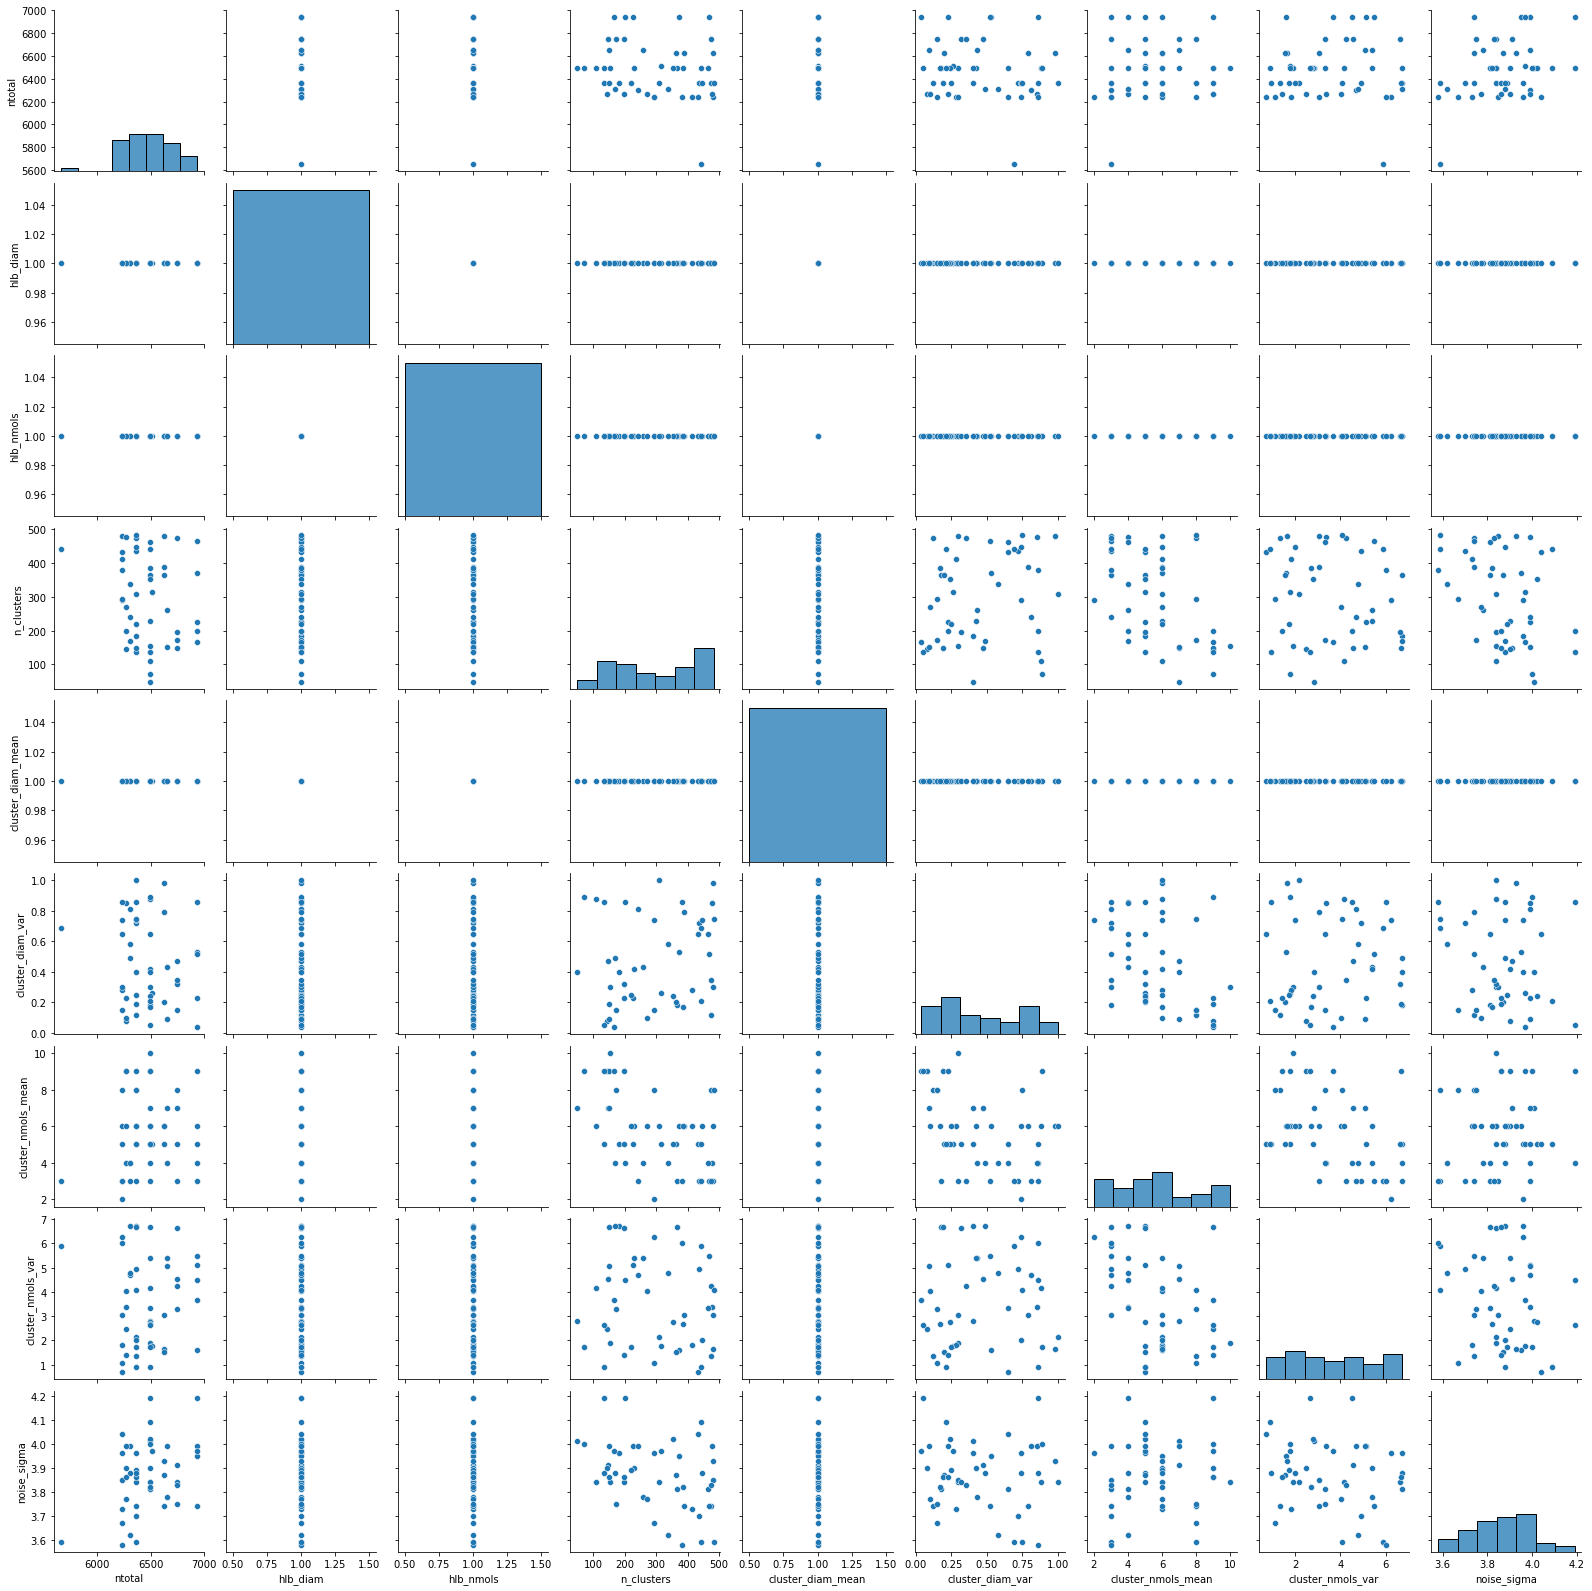

In [86]:
def find_in_radius_center(em1, files1, em2, files2, r):
    good_files = []
    center = np.mean(em1, axis=0)
    for i in range(len(files2)):
        if i % 250 == 0:
            pass
            #print(i)

        dist = np.sqrt(np.sum((center - em2[i]) ** 2))
        if dist <= r:
            good_files.append(files2[i])

    return np.unique(good_files)
sn.pairplot(make_df(find_in_radius_center(em1, files1, em2, files2, r=0.7)))
#len(find_in_radius_center(em1, files1, em2, files2, r=1))00

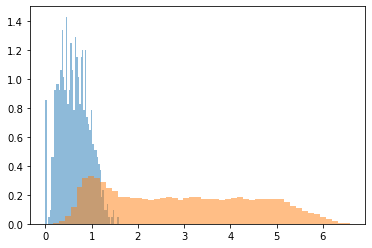

In [93]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-mut-early13_mix_real_sim_20220506_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-20220509-manyclust_aBMRJkAL_mix_real_sim_20220506_34layer.pkl') 
plt.hist(d_pairwise_all(em1, em1), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em1, em2), bins=50, alpha=0.5, density=True);

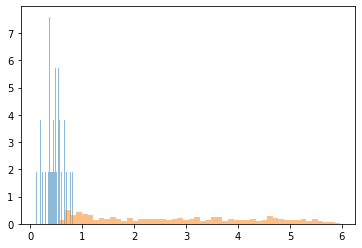

In [54]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-mut-early13_mix_real_sim_20220506_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-20220509-manyclust_aBMRJkAL_mix_real_sim_20220506_34layer.pkl') 
plt.hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
plt.hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

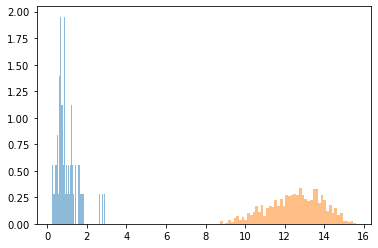

In [55]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-20220509-manysmallclust_nwhWyQpp_mix_real_sim_3_34layer.pkl') 
plt.hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
plt.hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

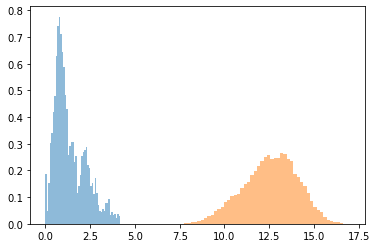

In [58]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings_zld-wt-20220509-manysmallclust_nwhWyQpp_mix_real_sim_3_34layer.pkl') 
plt.hist(d_pairwise_all(em1, em1), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em1, em2), bins=50, alpha=0.5, density=True);

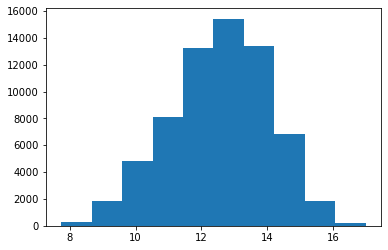

In [50]:
def find_in_radius(em1, files1, em2, files2, r):
    good_files = []
    for i in range(len(files1)):
        print(i)
        if i % 250 == 0:
            print(i)

        dists = dists_arr_to_row(em2, em1[i])
        good_uns = dists <= r
        #good_files1 = np.array(files1)[good_uns]
        good_files_this = list(np.array(files2)[good_uns])
        good_files = good_files + good_files_this

    return np.unique(good_files)

def d_pairwise_all(em1, em2):
    d = []
    for i in range(len(em2)):
        d_ = list(dists_arr_to_row(em1, em2[i]))
        d = d + d_
    return d
#find_in_radius(em1, files1, em2, files2, r=1)
d = d_pairwise_all(em1, em2)
plt.hist(d);

0


array([], dtype=float64)

In [29]:
sn.pairplot(make_df(find_in_radius(em1, files1, em2, files2, r=3)))

0


ValueError: Empty data passed with indices specified.

0


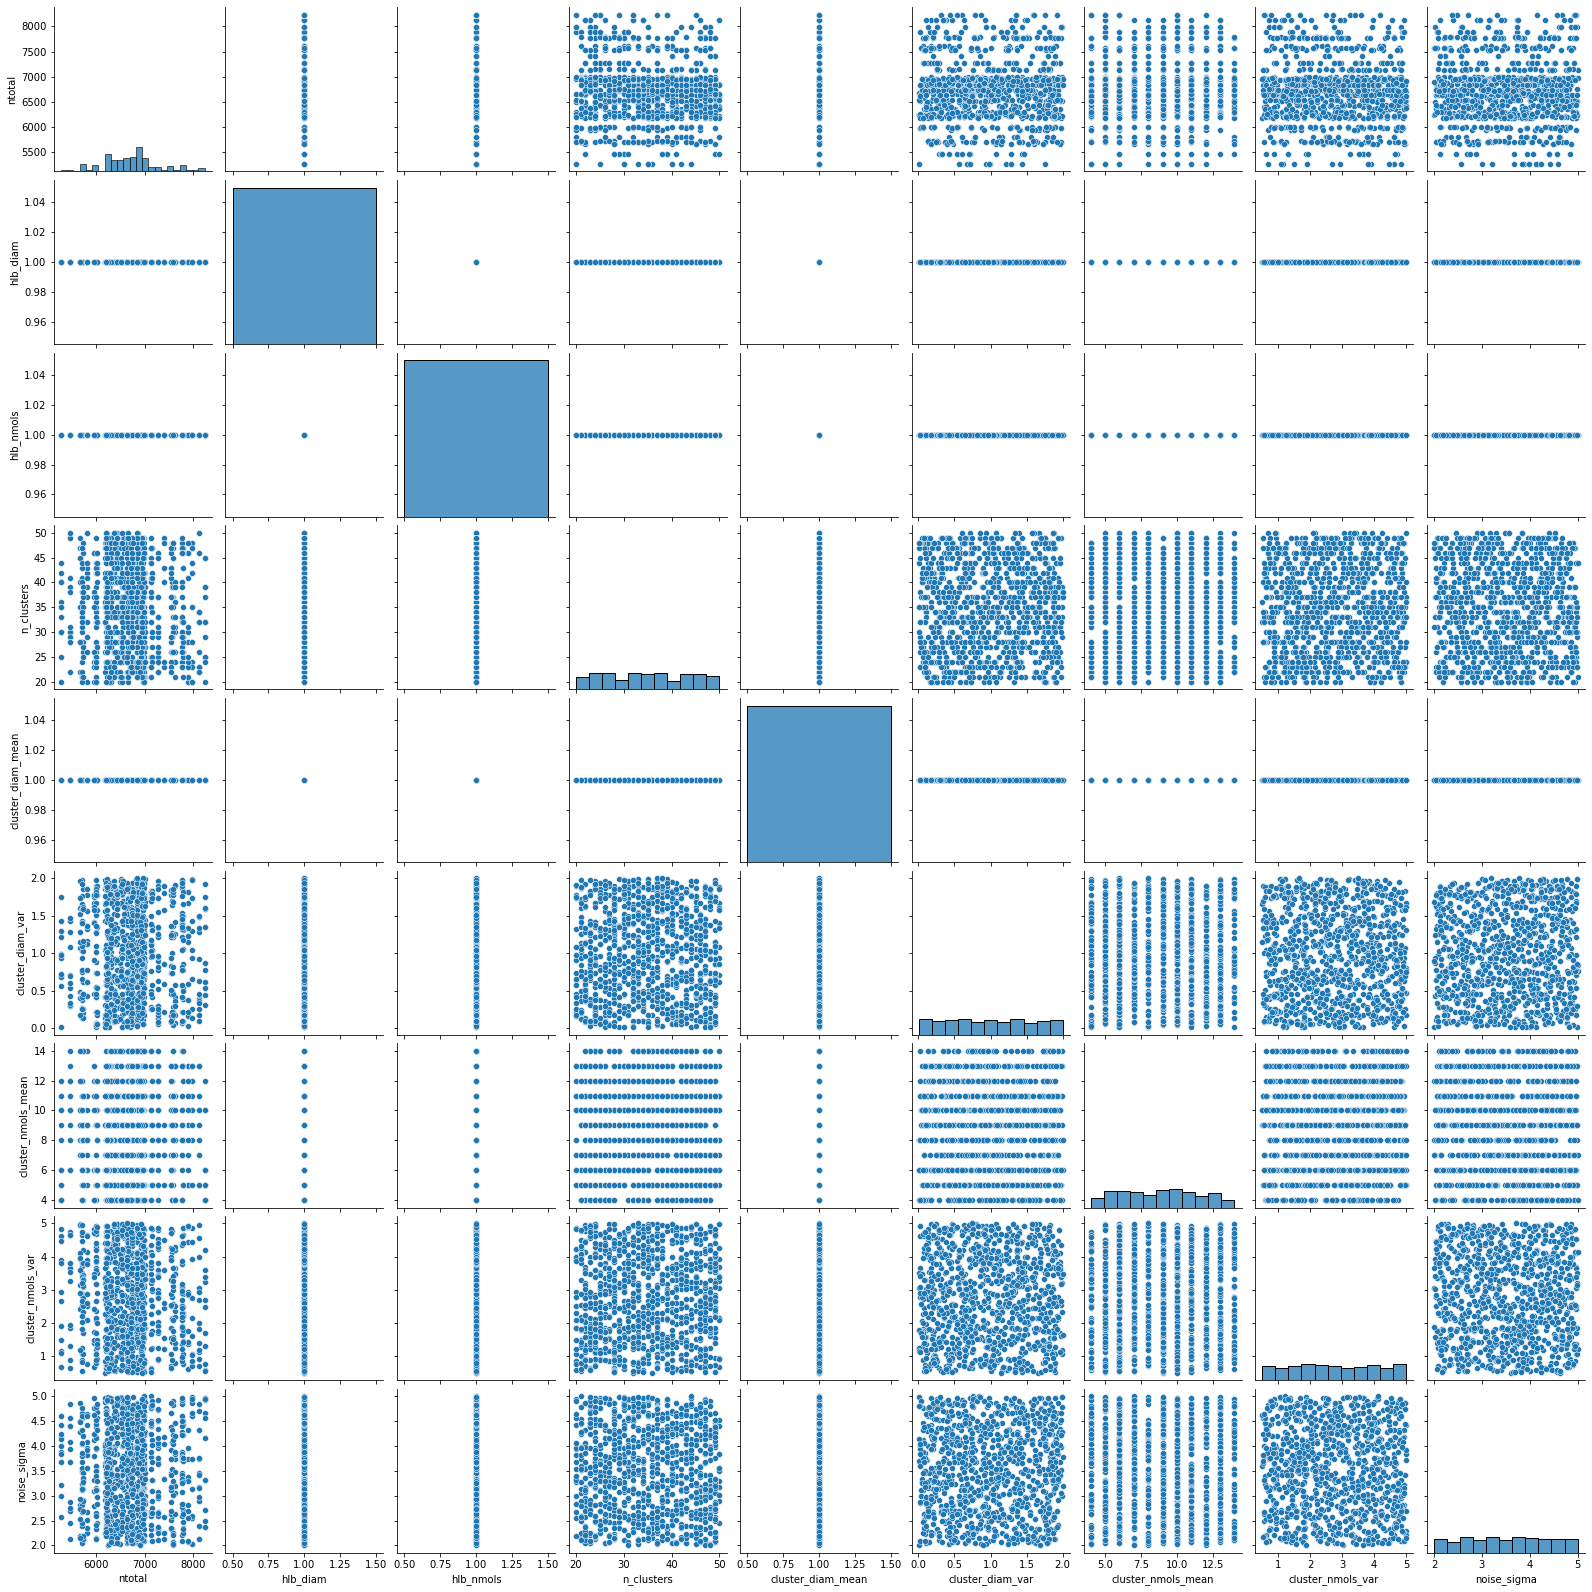

In [21]:
sn.pairplot(make_df(find_in_radius(em1, files1, em2, files2, r=np.inf)))

In [62]:
ds = cn.make_triplet_inputs('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/zld-mut-early13_filetriplets.gz', 20)
l = cnn_models.evaluate_models.visualize_batch(ds[0])
fm.viewer(l, 5, zmax=True)

interactive(children=(Dropdown(description='Color', index=10, options=('Gators', 'magma', 'inferno', 'Reds', '…

In [25]:
file1 = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/h2b_folding_mix_real_sim_20220506_34layer.pkl'
outstem = '/Users/michaelstadler/Desktop/temp/h2b-folding'
x = fm.load_pickle(file1)
np.savetxt(outstem + '_data.csv', x[0], delimiter='\t')
with open(outstem + '_names.csv', 'w') as file2:
    for item in x[1]:
        file2.write(item + '\n')

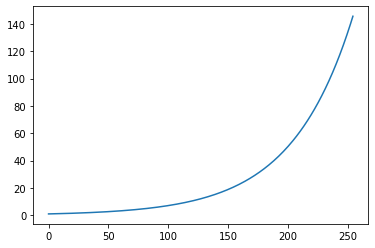

In [161]:
plt.plot(np.exp(np.arange(255) / 255 * 5))

In [119]:
k = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220503_100nmx50x50_41pxx25x25.pkl')
k = k / np.max(k)

In [159]:
def t(k, a):
    k2 = np.exp(k / np.max(k) * a)
    k2 = k2 / np.max(k2)
    return k2
k2 = t(k, 5)
fm.viewer([k.max(axis=1) * 1000, k2.max(axis=1) * 1000], 5)
fm.save_pickle(k2, '/Users/michaelstadler/Desktop/temp/a5.0.pkl')

interactive(children=(Dropdown(description='Color', index=5, options=('gray', 'magma', 'Reds', 'plasma', 'pris…

In [178]:
f = 0.05
k2 = k + f
k2 = k2 / np.max(k2)
fm.viewer([k.max(axis=1) * 1000, k2.max(axis=1) * 1000], 5)
fm.save_pickle(k2,'/Users/michaelstadler/Desktop/temp/add0.05.pkl')

interactive(children=(Dropdown(description='Color', index=5, options=('gray', 'magma', 'Reds', 'plasma', 'pris…

In [67]:
f = '/Users/michaelstadler/Bioinformatics/reference/dm6.fa'

seq = {}
chr_ = ''
for line in open(f, 'r'):
    line = line.rstrip()
    line = str.lower(line)
    if line[0] == '>':
        chr_ = line[1:]
        seq[chr_] = []
    else:
        seq[chr_].append(line)

for chr_ in seq:
    seq[chr_] = ''.join(seq[chr_])



In [118]:
pattern = 'aagagaagagaagagaagagaagag'
pattern2 = 'ctcttctcttctcttctcttctctt'
chrs = []
freqs = []
counts = []
for chr_ in seq:
    count = seq[chr_].count(pattern) + seq[chr_].count(pattern2)
    freq = count / len(seq[chr_])
    #freq = (seq[chr_].count(pattern) + seq[chr_].count(pattern2))/ len(seq[chr_])
    chrs.append(chr_)
    freqs.append(freq)
    counts.append(count)

chrs = np.array(chrs)
freqs = np.array(freqs)

s = pd.DataFrame([freqs, counts]).T
s.index = chrs
s.columns = ['freq', 'count']
s = s.sort_values(by='freq', ascending=False)
s.to_csv('/Users/michaelstadler/Bioinformatics/reference/aagag5x.csv')

In [42]:
em_s

NameError: name 'em_s' is not defined

In [184]:
k.shape

(41, 25, 25)

In [185]:
c = np.zeros((41,25,25))
c[20,12,12] = 1000
c = ndi.convolve(c, k)
fm.viewer([k.max(axis=1) * 1000,c.max(axis=1)], 5)

interactive(children=(Dropdown(description='Color', index=5, options=('gray', 'magma', 'Reds', 'plasma', 'pris…

In [186]:
?ndi.convolve

Signature:
ndi.convolve(
    input,
    weights,
    output=None,
    mode='reflect',
    cval=0.0,
    origin=0,
)
Docstring:
Multidimensional convolution.

The array is convolved with the given kernel.

Parameters
----------
input : array_like
    The input array.
weights : array_like
    Array of weights, same number of dimensions as input
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will be created.
mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The `mode` parameter determines how the input array is extended
    beyond its boundaries. Default is 'reflect'. Behavior for each valid
    value is as follows:

    'reflect' (`d c b a | a b c d | d c b a`)
        The input is extended by reflecting about the edge of the last
        pixel. This mode is also sometimes referred to as half-sample
        symmetric.

    'constant' (`k k k k 